In [340]:
#Problem Statement: To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).

#Objective: To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).

In [341]:
#given dataset to be imported and analysed by the help of given libraries
import pandas as pd            
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
games = "C:/Users/Nikhil/Desktop/games.csv" #dataset imported from the memory of the pc
Data = pd.read_csv(games) #dataset stored in variable "Data"
Data


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


In [342]:
#Data cleaning of dataset which includes removing of unwanted columns , null values and filling null values with required string or integer values

In [343]:
#removing unwanted columns
Data = Data.drop(columns = "URL")
Data = Data.drop(columns = "Icon URL")

In [344]:
#Games without User Rating should be dropped
#condition applied for boolean exppression
is_long = Data["Average User Rating"]>0
#boolean output checked
is_long 


0         True
1         True
2         True
3         True
4         True
         ...  
17002    False
17003    False
17004    False
17005    False
17006    False
Name: Average User Rating, Length: 17007, dtype: bool

In [345]:
#games without user rating is dropped
Data=Data[is_long] 
#length of data changed 
len(Data)

7561

In [346]:
#Games with less than 200 user rating AND days since last update date <6month should be dropped to prevent biased ratings from the developer
#new columns formed to store values so that changes can be made
Data["Original_Release_Date"] = Data["Original Release Date"]
Data["Current_Version_Release_Date"] = Data["Current Version Release Date"]
#converting object into date time to work with dates
Data["Original_Release_Date"] = pd.to_datetime(Data.Original_Release_Date) 
Data["Current_Version_Release_Date"] = pd.to_datetime(Data.Current_Version_Release_Date)
#differnce calculated to find out the time between last update and original version
Diff = (Data.Current_Version_Release_Date - Data.Original_Release_Date)
#converting timedelta into float value
Dif = pd.to_numeric(Diff) 
#converting into number of days
Dif = Dif/86400000000000  
#A new column is formed which contains the number of days between last update and original release date
Data["Difference"] = Dif  
#condition applied for boolean expressions
Difference= Data["Difference"] >=180.0
Ratings = Data["User Rating Count"]>200 
#Boolean expressions checked, by & operator expression will true only when both the expressions will be true
Ratings & Difference


0         True
1         True
2         True
3         True
4        False
         ...  
16950    False
16956    False
16962    False
16967    False
16993    False
Length: 7561, dtype: bool

In [347]:
#False values Dropped
Data = Data[Ratings & Difference]
#length of data changed
len(Data)

1858

In [348]:
#Null values replaced with strings in the columns with object datatype
Data.Subtitle = Data.Subtitle.fillna("---")
Data.Languages = Data.Languages.fillna("---")

In [349]:
#Null values of int and float replaced with zero
Data = Data.fillna(0)

In [350]:
#Genre tags "Entertainment" and "Games" are removed from the Genre string as it does not provide meaningful insight
Data["Genres"]=Data["Genres"].str.replace("Games","")
Data["Genres"]=Data["Genres"].str.replace("Entertainment","")
Data["Genres"]=Data["Genres"].str.replace(",","")

In [351]:
#size converted in MBs
Data['Size2'] = round(Data['Size']/1000000,1) 

In [352]:
Data.describe()

,ID,Average User Rating,User Rating Count,Price,Size,Difference,Size2
count,1.858000e+03,1858.00000,1.858000e+03,1858.000000,1.858000e+03,1858.000000,1858.000000
mean,8.118634e+08,4.24704,1.265629e+04,0.776216,2.072815e+08,1306.082347,207.280517
std,3.460235e+08,0.53227,8.449930e+04,3.696310,3.387332e+08,881.158995,338.733277
min,2.849214e+08,1.50000,2.010000e+02,0.000000,2.158400e+05,180.000000,0.200000
25%,4.901696e+08,4.00000,4.630000e+02,0.000000,5.224550e+07,550.500000,52.225000
50%,8.216287e+08,4.50000,1.253000e+03,0.000000,1.208110e+08,1079.500000,120.850000
75%,1.102737e+09,4.50000,5.107000e+03,0.000000,2.291215e+08,1934.500000,229.100000
max,1.456389e+09,5.00000,3.032734e+06,139.990000,3.916692e+09,4086.000000,3916.700000


In [353]:
#after applying all the changes and cleaning the data, the data looks like
Data

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Original_Release_Date,Current_Version_Release_Date,Difference,Size2
0,284921427,Sudoku,---,4.0,3553.0,2.99,0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,Strategy Puzzle,11/07/2008,30/05/2017,2008-11-07,2017-05-30,3126.0,15.9
1,284926400,Reversi,---,3.5,284.0,1.99,0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,Strategy Board,11/07/2008,17/05/2018,2008-11-07,2018-05-17,3478.0,12.3
2,284946595,Morocco,---,3.0,8376.0,0.00,0,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,Board Strategy,11/07/2008,5/09/2017,2008-11-07,2017-05-09,3105.0,0.7
3,285755462,Sudoku (Free),---,3.5,190394.0,0.00,0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,Strategy Puzzle,23/07/2008,30/05/2017,2008-07-23,2017-05-30,3233.0,21.6
12,288669794,BubblePop,---,3.0,526.0,0.00,0,Are you ready for some popping? Once you pop ...,TMSOFT,4+,EN,845008.0,Games,Strategy,22/08/2008,25/07/2009,2008-08-22,2009-07-25,337.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15736,1446535007,Woody Bricks and Ball Puzzles,Isometric Bricks and Ball Game,4.5,1746.0,0.00,0,Very exciting isometric woody ball game. \n\nS...,MarkApp Co. Ltd,4+,EN,122299392.0,Games,Strategy Puzzle,15/12/2018,30/07/2019,2018-12-15,2019-07-30,227.0,122.3
15833,1447869171,Bubble Pop Spinner,Spin the board & blast bubbles,4.5,1398.0,0.00,"0.99, 2.99, 8.99, 17.99, 0.99, 49.99, 94.99",Enjoy the most fun bubbles game with awesome n...,Ilyon Dynamics Ltd.,4+,EN,91956224.0,Games,Casual Strategy,21/01/2019,29/07/2019,2019-01-21,2019-07-29,189.0,92.0
15977,1450255214,Hexonia,Ready for battle?,3.5,446.0,0.00,"2.99, 1.99, 2.99, 1.99, 1.99, 2.99",Choose a Tribe and build your kingdom. Conquer...,TOGGLEGEAR,12+,EN,130210816.0,Games,Strategy Adventure,28/01/2019,12/06/2019,2019-01-28,2019-12-06,312.0,130.2
16171,1453961597,Idle Convoy VS Zombies Inc,Armored Vehicles and Soldiers!,4.5,329.0,0.00,"4.99, 1.99, 4.99","Hundreds of years later, the world is dominate...",CapPlay.com,9+,EN,268316672.0,Games,Adventure Strategy,27/05/2019,12/07/2019,2019-05-27,2019-12-07,194.0,268.3


In [354]:
#Game size analysis
#Data is grouped in 3 groups i.e. game size less than 250 mb,game size between 250 mb amnd 1 gb, game size more than 1 gb 
Size_Less_than_250MB = Data[Data.Size2 <250]
Size_between_250MB_and_1GB = Data[(Data.Size2 >=250) & (Data.Size2 <1000)]
Size_More_than_1GB = Data[Data.Size2 >=1000]


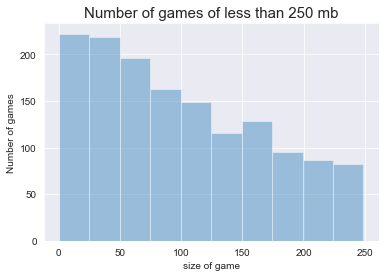

In [355]:
#Graph of number of games of size less than 250 mb
df1 = sns.distplot(Size_Less_than_250MB.Size2, bins = 10 , kde = False)
#x axis = size of game, y axis = number of games
df1.set(xlabel="size of game" ,ylabel="Number of games")
df1.set_title("Number of games of less than 250 mb", fontsize=15)
sns.set_style("darkgrid")
plt.ioff()

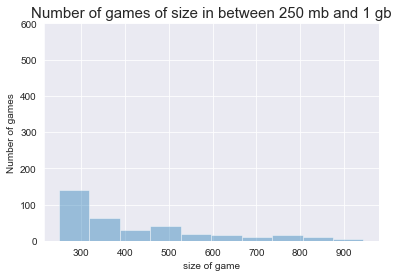

In [356]:
#Graph of number of games of size between 250 mb and 1 gb
df2=sns.distplot(Size_between_250MB_and_1GB.Size2, bins= 10, kde=False)
#x axis = size of game, y axis = number of games
df2.set(xlabel="size of game" ,ylabel="Number of games")
df2.set_title("Number of games of size in between 250 mb and 1 gb",fontsize=15)
df2.set(ylim=(0,600))
plt.ioff()

<function matplotlib.pyplot.ioff()>

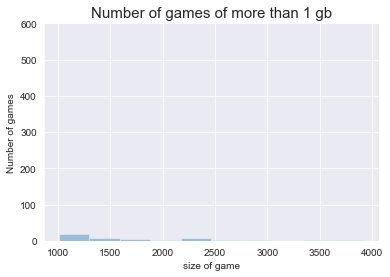

In [357]:
#Graph of number of games of size more than 1 gb
df3 = sns.distplot(Size_More_than_1GB.Size2, bins= 10, kde=False)
#x axis = size of game, y axis = number of games
df3.set(xlabel="size of game" ,ylabel="Number of games")
df3.set_title("Number of games of more than 1 gb", fontsize = 15)
df3.set(ylim=(0,600))
plt.ioff

In [358]:
#Graphs can clearly give the results that most of the games in the data is of less than 50 mb

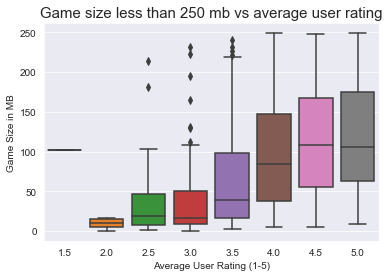

In [359]:
#Graph between average user rating and game size of less than 250 mb
df4=sns.boxplot( data = Size_Less_than_250MB, x = 'Average User Rating', y = 'Size2')
#x axis = average user rating, y axis = game size in mb
df4.set(xlabel='Average User Rating (1-5)',ylabel='Game Size in MB')
df4.set_title("Game size less than 250 mb vs average user rating", fontsize = 15)

plt.ioff()

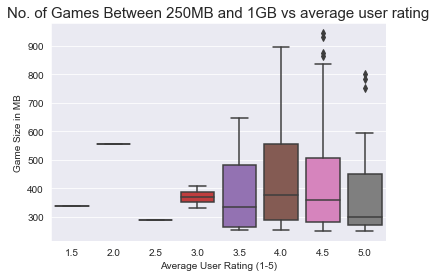

In [360]:
#Graph between average user rating and game size between 250 mb and 1 gb
df5= sns.boxplot( data = Size_between_250MB_and_1GB, x = 'Average User Rating', y = 'Size2')
#x axis = size of game, y axis = number of games
df5.set(xlabel='Average User Rating (1-5)',ylabel='Game Size in MB')
df5.set_title('No. of Games Between 250MB and 1GB vs average user rating',fontsize = 15)
plt.ioff()

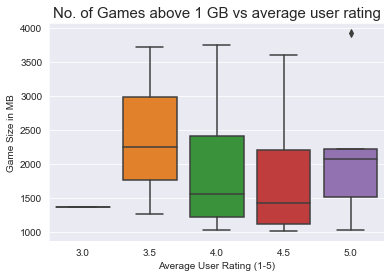

In [361]:
#Graph between average user rating and game of size more than 1 gb
df6=sns.boxplot( data = Size_More_than_1GB, x = 'Average User Rating', y = 'Size2')
#x axis = size of game, y axis = number of games
df6.set(xlabel='Average User Rating (1-5)',ylabel='Game Size in MB')
df6.set_title("No. of Games above 1 GB vs average user rating",fontsize = 15)
plt.show()


In [362]:
#Data analysed by the graphs of game size vs average user rating shows that games between 50 mb and 1500 mb got the highest user ratings

In [363]:
#Genre grouping by strings
#Unwanted strings which can affect the genre are removed
NIG=Data[~Data.Genres.str.contains('Puzzle') & \
         ~Data.Genres.str.contains('Action') & \
         ~Data.Genres.str.contains('Family')& \
         ~Data.Genres.str.contains('Education')& \
         ~Data.Genres.str.contains('Family')& \
         ~Data.Genres.str.contains('Adventure')&\
         ~Data.Genres.str.contains('Board')&\
         ~Data.Genres.str.contains('Role')].index
Data.drop(NIG , inplace=True)

In [364]:
#Grouping of genre on the basis of specific strings
Data.loc[Data['Genres'].str.contains('Puzzle'),'Genres'] = 'Puzzle'
Data.loc[Data['Genres'].str.contains('Board'),'Genres'] = 'Puzzle'
Data.loc[Data['Genres'].str.contains('Action'),'Genres'] = 'Action'
Data.loc[Data['Genres'].str.contains('Adventure'),'Genres'] = 'Adventure'
Data.loc[Data['Genres'].str.contains('Role'),'Genres'] = 'Adventure'
Data.loc[Data['Genres'].str.contains('Family'),'Genres'] = 'Family'
Data.loc[Data['Genres'].str.contains('Education'),'Genres'] = 'Family'

In [365]:
#Array of all the genres
Data.Genres.unique()

array(['Puzzle', 'Action', 'Adventure', 'Family'], dtype=object)

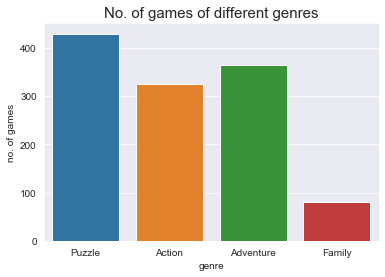

In [366]:
#Graph of number of games of differnt genres
x = ['Puzzle', 'Action', 'Adventure', 'Family']
y = [Data.Genres[(Data['Genres']=='Puzzle')].count(),Data.Genres[(Data['Genres']=='Action')].count(),Data.Genres[(Data['Genres']=='Adventure')].count(),Data.Genres[(Data['Genres']=='Family')].count()]
dat=sns.barplot(x,y)
# x axis = Genres , y axis = Number of games
dat.set_title("No. of games of different genres",fontsize = 15)
dat.set(xlabel = "genre", ylabel= "no. of games")
plt.ioff()

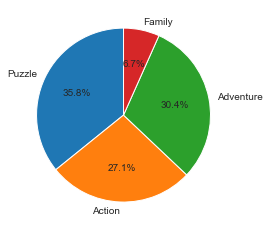

In [367]:
#Pie chart of number of games of different genres
plt.pie(y,labels=x,startangle=90,autopct='%.1f%%')
plt.show()

In [368]:
#Bar graph and pie chart clearly shows that most of the ganes are puzzle games as 35.8% games are puzzle games.
#It clearly indicates that most of the developers are into puzzle games

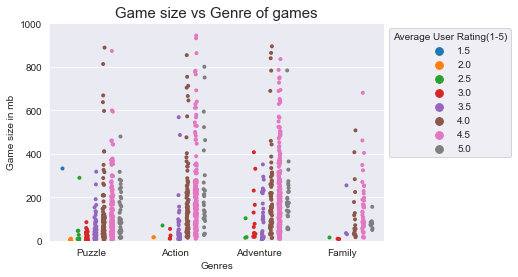

In [369]:
#Graph of size of games of different genres with average user rating
Size_genres_plot= sns.stripplot(y='Size2' , x='Genres', data=Data,hue='Average User Rating',dodge=True, size=4)
plt.legend(title='Average User Rating(1-5)',bbox_to_anchor=(1, 1))
Size_genres_plot.set(ylim=(0, 1000))
#x axis = Genres , y axis = Game size with different colours of scatter points describing the user rating
Size_genres_plot.set(xlabel='Genres',ylabel='Game size in mb')
Size_genres_plot.set_title("Game size vs Genre of games",fontsize = 15)
plt.ioff()

[(0, 5)]

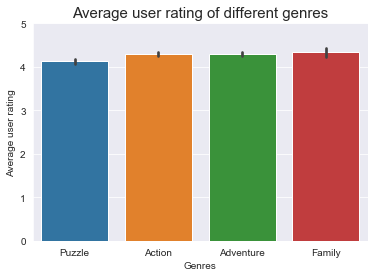

In [370]:
#Graph to find out the genres with highest user ratings
xyz = sns.barplot(y = "Average User Rating", x= "Genres", data = Data)
#x axis = genres, y axis = Average user rating
xyz.set(xlabel= "Genres", ylabel = "Average user rating")
xyz.set_title("Average user rating of different genres",fontsize = 15)
xyz.set(ylim=(0,5))

In [371]:
#From the above graphs of average user rating and genres,it's indicated that family games,action games and adventure got highest ratings
#Users are loving action and adventure games with family games too

In [372]:
#Release date/ Update date factor
#for loop applied to get the year of the date
for i in (list(Data.index.values)):
    Data['Original Release Date'][i]=Data['Original Release Date'][i][-4:]  

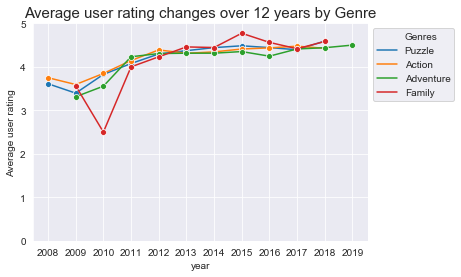

In [373]:
#Graph of change in average user rating of games of different genres across the years
liplt = sns.lineplot(x="Original Release Date", y= "Average User Rating", hue="Genres",data= Data, err_style=None, marker='o')
liplt.set(ylim=(0,5))
plt.legend(bbox_to_anchor=(1,1))
liplt.set_title('Average user rating changes over 12 years by Genre',fontsize=15)
# xaxis = year of games , y axis= average user rating
liplt.set(xlabel = "year", ylabel ="Average user rating" )
plt.ioff()

In [374]:
#Above data shows that puzzle, action, and adventure games are performing consistently
#Family games did a major improvement from 2010

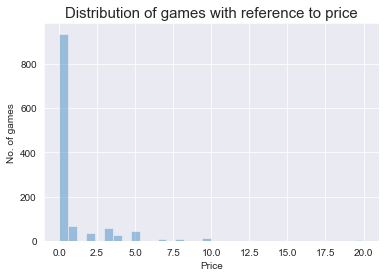

In [375]:
#Game Price
#Graph of number of games of different prices
price_plt= sns.distplot(Data.Price,kde=None)
price_plt.set_title("Distribution of games with reference to price",fontsize=15)
# x axis= Price, y axis= Number of games
price_plt.set(xlabel="Price" , ylabel = "No. of games")
plt.ioff()

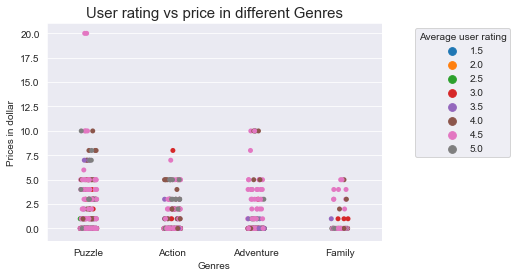

In [376]:
#Graph of games of different genres to their price in dollars with average user ratings
price_plt2 = sns.stripplot(y = "Price", x= "Genres", hue = "Average User Rating", data = Data)
plt.legend(title="Average user rating",bbox_to_anchor=(1.4,1))
#x axis= Genres, y axis = price and third axis is of dollars
price_plt2.set(xlabel = "Genres", ylabel = "Prices in dollar")
price_plt2.set_title("User rating vs price in different Genres",fontsize=15)
plt.ioff()

In [377]:
#Above data represents that most of the games are free but adventure and puzzle games of price less than 5$ are most loved

In [378]:
#In-app purchase
#Storing data in another data set to make changes without affecting the main dataset
Data2 = Data.copy()
#importing statistics for mean
import statistics as sts

In [379]:
#Replacing commas and null values to get proper object data type
Data2['In-app Purchases'] = Data2['In-app Purchases'].str.replace(",","")
Data2['In-app Purchases'] = Data2['In-app Purchases'].fillna(0)
#Using for loop to assign some values to zero in app purchase.
for i in (list(Data2['In-app Purchases'].index.values)):
    if Data2['In-app Purchases'][i] == 0:
        Data2['In-app Purchases'][i] = 0.01
#calculating mean of all the values in single index value
    elif Data2['In-app Purchases'][i]!=0:
        A= str.split(Data2['In-app Purchases'][i])
        A= [float(i) for i in A]
        Data2['In-app Purchases'][i] = sts.mean(A)

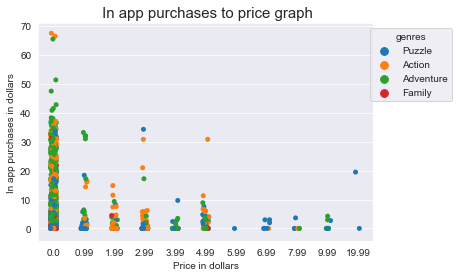

In [380]:
#Plotting graph between In app purchases and price of the games
vis = sns.stripplot(y=Data2['In-app Purchases'], x = Data2['Price'], hue= Data2['Genres'] , data = Data2)
vis.set_title(" In app purchases to price graph",fontsize=15)
# x axis = Price($), y axis = in app purchses($) and third axis represents genres
vis.set(xlabel = 'Price in dollars', ylabel = 'In app purchases in dollars')
plt.legend(title = 'genres',bbox_to_anchor=(1.25,1))
plt.ioff()

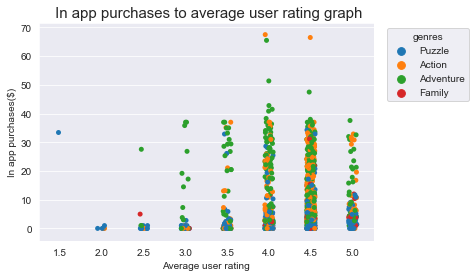

In [381]:
#plotting graph between in app purchases and user ratings
visx= sns.stripplot(x=Data2['Average User Rating'], y = Data2['In-app Purchases'], hue= Data2['Genres'] , data = Data2)
# x axis = average user rating, y axis= in app purchase and third axis represents genres
visx.set(xlabel = 'Average user rating', ylabel = 'In app purchases($)')
visx.set_title(" In app purchases to average user rating graph",fontsize=15)
plt.legend(title = 'genres',bbox_to_anchor=(1.3,1))
plt.ioff()

In [382]:
#From the above graphs we can clearly acknowledge that games with less price has most in app purchases
#Games with in app purchases below 40$ has highest user ratings 

In [383]:
#Age Rating Factor
#creating new column and storing the values
Data["AR"] = Data["Age Rating"]

In [384]:
#array of different age rating groups
Data.AR.unique()

array(['4+', '9+', '12+', '17+'], dtype=object)

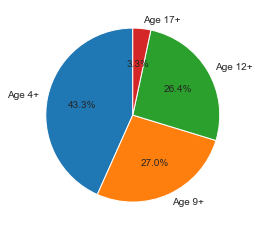

In [385]:
#Pie chart to get the percentage of games of different age rating group
#age rating values counted and stored in variable
DAR=[Data.AR[(Data['AR']=='4+')].count(),Data.AR[(Data['AR']=='9+')].count(),Data.AR[(Data['AR']=='12+')].count(),Data.AR[(Data['AR']=='17+')].count()]
AR = ['Age 4+','Age 9+','Age 12+','Age 17+']
plt.pie(DAR ,labels=AR, startangle=90, autopct='%.1f%%')
plt.show()

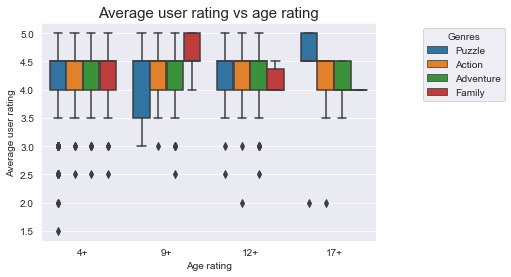

In [386]:
#Graph to analyse the average user ratings of different age rating groups
Data["AUR"]= Data["Average User Rating"]
DAR2 = sns.boxplot(x = Data.AR, y = Data.AUR, hue = Data.Genres, data= Data)
plt.legend(title= "Genres",bbox_to_anchor= (1.4,1))
#x axis = age rating, y axis = average user rating with third axis og genres
DAR2.set(xlabel ="Age rating",ylabel="Average user rating")
DAR2.set_title("Average user rating vs age rating",fontsize = 15)
plt.show()

In [387]:
#Age rating of more than 4+ age ratings are most in numbers,and performences of family games and puzzle games of 9+ and 17+ are best 

In [ ]:
#result = Objective was to give the strategy to get the average user rating above 4.5.By the above analysis we can clearly conclude that family,action and adventure games of size 50 to 1500mb,price less than 5$, in app purchases minimum and age rating of 9+ and 17+ are most likely to get user rating more than 4.5.